In [1]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import math
import h5py

In [2]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

pio.templates.default = "simple_white"

# I. Data check

In [43]:
df=pd.read_csv('TECAN_211105.csv',delimiter=',',index_col=0)  
time0 = df.to_numpy()[0]/60;

## check temperature

In [44]:
def f_constant(x,c):
    return c

xdata = df.to_numpy()[0]/60;
ydata = df.to_numpy()[1];
param, cov = curve_fit(f_constant, xdata[1:], ydata[1:])
av_T = str(param[0])[:5]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=xdata,
    y=ydata,
    mode='lines+markers', # Style name/legend entry with html tags
    name='Raw'# override default to connect the gaps
))

fig.add_trace(go.Scatter(
    x=xdata,
    y=np.repeat(param[0],len(xdata)),
    name='Fit',
))

fig.add_annotation(x=570, y=30.3,
            text='average T = '+av_T+' C')

fig.update_layout(xaxis_title='Time (min)',\
                  yaxis_title='Temperature (C)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 16

fig.show()
fig.write_html("data_211105/01_temperature.html")

In [45]:
xdata = df.to_numpy()[0]/60;
ydata1 = df.loc['A6'].to_numpy()
ydata2 = df.loc['B6'].to_numpy()
ydata3 = df.loc['C6'].to_numpy()
ydata4 = df.loc['D6'].to_numpy()
ydata5 = df.loc['D2'].to_numpy()
ydata6 = df.loc['D3'].to_numpy()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=xdata,
    y=ydata1,
    mode='lines+markers', # Style name/legend entry with html tags
    name='LBMM+IPTG'# override default to connect the gaps
))

fig.add_trace(go.Scatter(
    x=xdata,
    y=ydata2,
    mode='lines+markers', # Style name/legend entry with html tags
    name='LBMM+IPTG'# override default to connect the gaps
))

fig.add_trace(go.Scatter(
    x=xdata,
    y=ydata3,
    mode='lines+markers', # Style name/legend entry with html tags
    name='LBMM+Amp100+Kan50+IPTG'# override default to connect the gaps
))

fig.add_trace(go.Scatter(
    x=xdata,
    y=ydata4,
    mode='lines+markers', # Style name/legend entry with html tags
    name='LBMM+Amp100+Kan50+IPTG'# override default to connect the gaps
))

fig.add_trace(go.Scatter(
    x=xdata,
    y=ydata5,
    mode='lines+markers', # Style name/legend entry with html tags
    name='uninfected+Kan'# override default to connect the gaps
))

fig.add_trace(go.Scatter(
    x=xdata,
    y=ydata6,
    mode='lines+markers', # Style name/legend entry with html tags
    name='uninfected+Kan'# override default to connect the gaps
))

for i in [10,21,42,62,97,227]:
    fig.add_vline(x=time[i],line_width=2, line_dash="dash", line_color="green")

fig.update_layout(template='simple_white',\
                  xaxis_title='Time (min)',\
                  yaxis_title='OD600 (blank)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 16

fig.show()
fig.write_html("data_211105/02_blank.html")

## check other samples

In [46]:
xdata = df.to_numpy()[0]/60;
labels = ['MOI=10','MOI=10','MOI=10','MOI=10',\
          'uninf', 'uninf', 'uninf', \
          'uninf (1e2 dilu)','uninf (1e2 dilu)','uninf (1e2 dilu)',\
          'lysogen','lysogen','lysogen','lysogen',\
          'lysogen (1e2 dilu)','lysogen (1e2 dilu)','lysogen (1e2 dilu)','lysogen (1e2 dilu)'];
k = 0;
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']; 
labels_arr = []; 

l = 0; 
fig = go.Figure()
for j in ['A1','B1','C1','D1',\
          'A2','B2','C2',\
          'A3', 'B3', 'C3', \
         'A4','B4','C4','D4',\
         'A5','B5','C5','D5']:
    if labels[k] in labels_arr:
        l = l;
    else:
        l = l+1;
        labels_arr.append(labels[k]);
    
    fig.add_trace(go.Scatter(
    x=xdata,
    y=df.loc[j].to_numpy(),
    mode='lines+markers', # Style name/legend entry with html tags
    name=labels[k],
        marker=dict(color=colors[l], size=4),# override default to connect the gaps
))
    k = k+1; 

for i in [10,21,42,62,97,227]:
    fig.add_vline(x=time[i],line_width=2, line_dash="dash", line_color="green")

fig.update_layout(xaxis_title='Time (min)',\
                  yaxis_title='OD600',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
#fig.update_layout(title_text='uninfected', title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html("data_211105/03_all.html")

In [47]:
df = df.drop(['11','22','43','63','98','228'], axis=1)

In [48]:
time = df.to_numpy()[0]/60;

In [49]:
xdata = df.to_numpy()[0]/60;
labels = ['MOI=10','MOI=10','MOI=10','MOI=10',\
          'uninf', 'uninf', 'uninf', \
          'uninf (1e2 dilu)','uninf (1e2 dilu)','uninf (1e2 dilu)',\
          'lysogen','lysogen','lysogen','lysogen',\
          'lysogen (1e2 dilu)','lysogen (1e2 dilu)','lysogen (1e2 dilu)','lysogen (1e2 dilu)'];
k = 0;
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']; 
labels_arr = []; 

l = 0; 
fig = go.Figure()
for j in ['A1','B1','C1','D1',\
          'A2','B2','C2',\
          'A3', 'B3', 'C3', \
         'A4','B4','C4','D4',\
         'A5','B5','C5','D5']:
    if labels[k] in labels_arr:
        l = l;
    else:
        l = l+1;
        labels_arr.append(labels[k]);
    
    fig.add_trace(go.Scatter(
    x=xdata,
    y=df.loc[j].to_numpy(),
    mode='lines+markers', # Style name/legend entry with html tags
    name=labels[k],
        marker=dict(color=colors[l], size=4),# override default to connect the gaps
))
    k = k+1; 

fig.update_layout(xaxis_title='Time (min)',\
                  yaxis_title='OD600',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
#fig.update_layout(title_text='uninfected', title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
#fig.write_html("data_211105/03_all.html")

# II. Growth rate estimation

In [50]:
def get_linear_range(time, data, start_thresh, R_square_thresh, min_points, plot_yes):
#    R_square_thresh = 0.999; 
    
    # skip nan
    start_idx = 0; 
    tmp = np.where(np.isnan(data)==True)[0]
    if len(tmp) > 0:
        start_idx = tmp[-1]
        
    # skip low values
    tmp = np.where(data >= np.log2(start_thresh))[0]
    if len(tmp) > 0:
        start_idx = max(start_idx, tmp[0])
        
    # choose starting point
    end_idx = min(start_idx+200, len(data)); 
    starting_idx = np.arange(start_idx,end_idx,1);
#    print(start_idx)
#    print(end_idx)
    R_square0 = np.array([]);
    for j in starting_idx:
        xdata = time[j:j+12];
        ydata = data[j:j+12];
        slope, intercept, r_value, _, _ = linregress(xdata, ydata);
        R_square0 = np.append(R_square0, r_value);
    
    if (len(np.where(R_square0>R_square_thresh)[0]) == 0):
        print('fail to find starting points: please lower R_square_thresh');
        return np.array([0,0])
    else:
        j_0 = starting_idx[np.where(R_square0>R_square_thresh)[0][0]];
    
        # choose number of fitting points
        R_square = np.array([]);
        max_points_allowed = len(data)-j_0;
        if max_points_allowed == 0:
            print('fail to find #fitting points: please lower R_square_thresh');
            return np.array([0,0])
        else:
            if max_points_allowed <= min_points: #what about = 0? 
                fitting_points = np.array([max_points_allowed]);
            else:
                fitting_points = np.arange(min_points,min(50,max_points_allowed),1);
            for j in fitting_points:
                xdata = time[j_0:j_0+j];
                ydata = data[j_0:j_0+j];
                slope, intercept, r_value, _, _ = linregress(xdata, ydata);
                R_square = np.append(R_square, r_value);
            tmp2 = np.argmax(R_square);
            j = fitting_points[tmp2]; 
            if plot_yes == True:
                plt.rcParams["figure.figsize"] = (8,7)
                subplot(2,1,1)
                plt.plot(starting_idx, R_square0,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j_0,color='k',alpha = 0.5);
                plt.xlabel('index of fitting start point')
                plt.ylabel('R squared')
                plt.grid(True)
                subplot(2,1,2)
                plt.plot(fitting_points, R_square,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j,color='k',alpha = 0.5);
                plt.xlabel('number of fitting points')
                plt.ylabel('R squared')
                plt.grid(True)
                plt.tight_layout()
            return np.array([j_0, j]);
    

<ipython-input-51-ba7c0f43c9e9>:12: RuntimeWarning:

invalid value encountered in log2



array([27, 20])

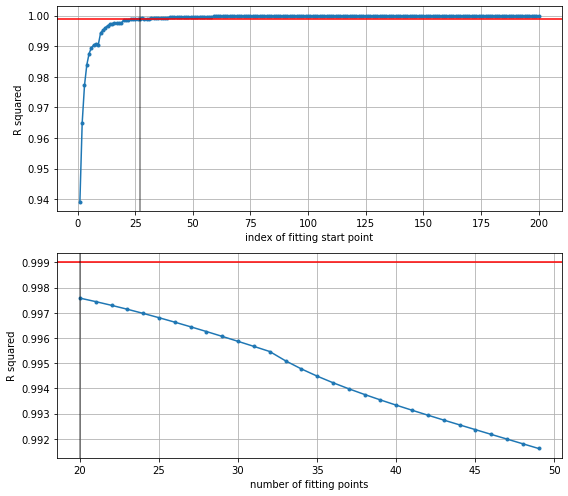

In [51]:
inf = np.array([2,8,14,20])
uninf = np.array([3,9,15])
uninf_dilu = np.array([4,10,16])
lyso = np.array([5,11,17,23])
lyso_dilu = np.array([6,12,18,24])
idx_blank = np.array([7,13,19,25])

time = df.to_numpy()[0]/60

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)

get_linear_range(time, np.log2(df.to_numpy()[0]-ave_blank), 0.01, 0.999, 20, 1)

In [52]:
sample_d = {};

class Sample:
    def __init__(self, name, sample_idx, growth_rate,N0):
        self.sample_name = name
        self.sample_idx = sample_idx
        self.growth_rate = growth_rate
        self.N0 = N0

In [74]:
inf = np.array([2,8,14,20])
uninf = np.array([3,9,15])
uninf_dilu = np.array([4,10,16])
lyso = np.array([5,11,17,23])
lyso_dilu = np.array([6,12,18,24])
idx_blank = np.array([7,25])

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0); 

labels = ['MOI=10','MOI=10','MOI=10','MOI=10',\
          'uninf', 'uninf', 'uninf', \
          'uninf (1e2 dilu)','uninf (1e2 dilu)','uninf (1e2 dilu)',\
          'lysogen','lysogen','lysogen','lysogen',\
          'lysogen (1e2 dilu)','lysogen (1e2 dilu)','lysogen (1e2 dilu)','lysogen (1e2 dilu)'];

fig = go.Figure()
#plt.rcParams["figure.figsize"] = (20,10)
k = 0;
labels = ['MOI=10','uninf','uninf (1e2 dilu)','lysogen','lysogen (1e2 dilu)']; 
colors = ['#8856a7','#d95f0e','#9ebcda','#fec44f','#2ca25f','#99d8c9'];
for i in (inf, uninf, uninf_dilu, lyso, lyso_dilu):

    sample = np.log2(df.to_numpy()[i]-ave_blank);
    for kk in range(0,len(sample)):
        data = sample[kk,:];
        if labels[k] == 'lysogen' and kk == 3:
            array_tmp = get_linear_range(time, data, 0.02, 0.999, 20, 0);
        else:
            array_tmp = get_linear_range(time, data, 0.01, 0.995, 20, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        xdata = time[j_0:j_0+j];
        ydata = data[j_0:j_0+j];
        slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
        sample_d[i[kk]] = Sample(labels[k], i[kk], 1/slope, intercept);         
        generation_time = str(1/slope)[:4]; 
        
        
        fig.add_trace(go.Scatter(
            x=time,
            y=np.power(2,data),
            mode='markers',
            name=labels[k],
            marker=dict(size=3, color=colors[k]),
        ))
        
        fig.add_trace(go.Scatter(
            x=time,
            y=np.power(2,slope*time+intercept),
            mode='lines', 
            name='tau'+'='+generation_time+' min,'+' N='+str(j),
            line=dict(color=colors[k],width=1),
        ))

    k = k+1; 

for i in [10,21,42,62,97,227]:
    fig.add_vline(x=time0[i],line_width=2, line_dash="dash", line_color="green")

        
fig.update_layout(font_family="arial",\
                  xaxis_title='Time (min)',\
                  yaxis_title='OD600',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])



#fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)


fig.update_layout(legend=dict(
    font = dict(size=8),
))

fig.update_xaxes(range=[0, 600])
fig.update_yaxes(range=[2e-3, 1])
fig.layout.font.family = 'Arial'; fig.layout.font.size = 12

fig.show()
fig.write_html("data_211105/04_gr_fit.html")
#plt.xlim((0,900))
#plt.ylim((-9,0.8))
#plt.legend(labelcolor='linecolor',ncol=2); 
#plt.grid(True);
#plt.ylabel('log2 OD600'); plt.xlabel('Time (min)')
#plt.tight_layout()
#plt.title('overday without IPTG')

<ipython-input-74-0f05ecf47bc8>:23: RuntimeWarning:

invalid value encountered in log2

<ipython-input-74-0f05ecf47bc8>:23: RuntimeWarning:

divide by zero encountered in log2



In [72]:

fig = go.Figure()
k = 0;
labels = ['MOI=10','lysogen (1e2 dilu)','lysogen','uninf (1e2 dilu)','uninf']; 
colors = ['#8856a7','#d95f0e','#9ebcda','#fec44f','#2ca25f','#99d8c9'];
for i in (inf, lyso_dilu, lyso, uninf_dilu, uninf):
    growth_rate_all = np.array([]);
    for kk in range(0,len(i)):
        growth_rate_all = np.append(growth_rate_all, sample_d[i[kk]].growth_rate); 
    growth_rate_mean = np.mean(growth_rate_all);
    growth_rate_err = np.std(growth_rate_all); 
    fig.add_trace(go.Bar(
            x=[k], y=[growth_rate_mean],
            error_y=dict(type='data', array=[growth_rate_err.tolist()]), 
            text=labels[k],
            name=labels[k],
            marker_color=colors[k],
            textposition='auto',
    ))
#    plt.bar(k, growth_rate_mean, yerr=growth_rate_err, color = colors[k],label=labels[k])
    k = k+1; 

    
fig.update_layout(font_family="arial",\
#                  xaxis_title='MOI',\
                  yaxis_title='doubling time (min)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)


fig.update_yaxes(range=[0,60])
fig.layout.font.family = 'Arial'; fig.layout.font.size = 15

fig.show()
fig.write_html("data_211105/05_doubling_time_bar.html")


In [73]:

fig = go.Figure()
k = 0;
labels = ['MOI=10','lysogen (1e2 dilu)','lysogen','uninf (1e2 dilu)','uninf']; 
colors = ['#8856a7','#d95f0e','#9ebcda','#fec44f','#2ca25f','#99d8c9'];
for i in (inf, lyso_dilu, lyso, uninf_dilu, uninf):
    growth_rate_all = np.array([]);
    for kk in range(0,len(i)):
        fig.add_trace(go.Bar(
            x=[k+kk*0.25], y=[sample_d[i[kk]].growth_rate],
            text=labels[k],
            name=labels[k],
            marker_color=colors[k],
            textposition='auto',
    ))
#    plt.bar(k, growth_rate_mean, yerr=growth_rate_err, color = colors[k],label=labels[k])
    k = k+1; 

    
fig.update_layout(font_family="arial",\
#                  xaxis_title='MOI',\
                  yaxis_title='doubling time (min)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)


fig.update_yaxes(range=[0,60])
fig.layout.font.family = 'Arial'; fig.layout.font.size = 15

fig.show()
fig.write_html("data_211105/06_doubling_time_ind_bar.html")
